In [1]:
install.packages("MASS")
library("MASS")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("mltest")
library("mltest")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpCYPb0P\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpCYPb0P\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpCYPb0P\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'mltest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpCYPb0P\downloaded_packages


In [10]:
ionomics <- read.csv('geneva_y_raw_spec_as_int.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:200,]

In [11]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics[training.samples, ]
test.data <- ionomics[-training.samples, ]

In [12]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 0.6

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
      1       2       3       4       5       6       7       8 
0.05625 0.03125 0.15000 0.20000 0.02500 0.36250 0.11250 0.06250 

Group means:
       B11      Na23     Mg26      Al27      P31      S34      K39      Ca44
1 72.11339  74.35893 1382.970  6.738372 3681.906 2186.687 11010.92  8298.215
2 68.84750  73.01340 1767.475  8.544639 4659.557 2610.133 13063.98 10359.823
3 83.11139 114.60682 2210.137 18.345501 6138.352 3217.857 15982.22 12177.212
4 70.07269  78.31178 2262.089 10.092397 4671.786 2480.695 14844.20  9053.353
5 46.59096  81.36729 1619.238 21.004157 6014.788 2599.490 14672.10  6666.849
6 78.49168  58.76809 1548.382  7.585533 4178.446 2608.028 13520.13 11073.649
7 84.77534  54.18606 2015.249 18.085314 4609.254 2287.535 13172.75  8704.387
8 80.46978  58.81165 1599.386  9.422062 4489.586 2261.334 13049.56  8395.261
      Fe54     Mn55      Co59      Ni60      Cu63      Zn66        As75
1 52.09596 32

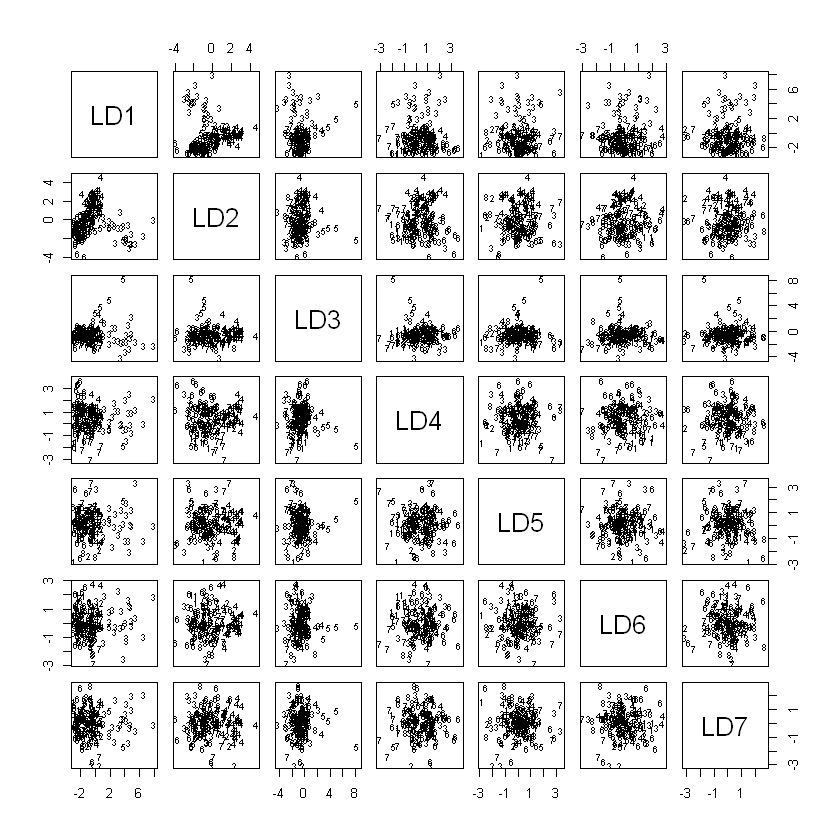

In [13]:
plot(model)

In [14]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 2 6 4 5 8
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
2,6.548263e-01,2.048900e-03,1.156106e-08,1.812172e-03,2.637321e-11,2.944289e-01,3.639311e-02,1.049059e-02
3,1.440075e-05,5.475552e-01,4.175053e-04,1.313885e-01,5.358183e-12,7.006979e-03,3.051960e-01,8.421409e-03
7,1.473860e-01,4.963049e-03,7.206547e-07,1.172905e-04,1.108886e-09,7.041868e-01,1.357824e-01,7.563735e-03
18,2.033867e-05,3.423053e-01,2.778079e-07,6.464779e-01,1.240562e-11,3.012882e-03,6.501603e-03,1.681717e-03
19,7.869685e-07,6.144230e-12,3.568654e-06,6.908012e-11,9.999956e-01,8.185079e-12,3.655511e-10,5.933529e-12
25,2.083258e-06,1.458043e-01,3.741627e-01,4.845020e-02,1.248637e-12,1.568518e-03,2.626828e-02,4.037440e-01


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
2,-1.849213,-0.2156998,0.3529770,-1.4418603,-0.5209704,0.9349079,-0.3121711
3,0.873355,1.2752618,-0.8282290,-0.1685723,0.7164109,-0.8275122,-3.1215868
7,-1.222756,-1.4629464,0.1957618,-1.6183887,0.4765757,-0.1289866,-2.4994249


In [15]:
table <- table(Predicted=predictions$class, spec_as_int=test.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         spec_as_int
Predicted  1  2  3  4  5  6  7  8
        1  1  0  0  1  0  1  0  0
        2  1  0  0  0  0  1  1  0
        3  0  0  3  0  0  0  0  0
        4  0  1  0  7  0  0  0  0
        5  0  0  1  0  1  0  0  0
        6  1  0  0  0  0 10  4  1
        7  0  0  0  0  0  0  2  0
        8  0  0  1  0  0  1  1  0

Overall Statistics
                                          
               Accuracy : 0.6             
                 95% CI : (0.4333, 0.7514)
    No Information Rate : 0.325           
    P-Value [Acc > NIR] : 0.0003199       
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.3333   0.0000   0.6000   0.8750   1.0000   0.7692
Specificity            0.9459   0.9231   1.0000   0.9688   0

In [16]:
mn.net <- nnet::multinom(spec_as_int ~ ., train.data)
ionomics.predictions <- predict(mn.net, newdata=test.data, type="prob")
ionomics.predictions <- as.data.frame(ionomics.predictions)
auc <- multiclass.roc(test.data$spec_as_int, ionomics.predictions, percent=TRUE)
print(auc)

# weights:  168 (140 variable)
initial  value 332.710647 
iter  10 value 244.191520
iter  20 value 214.844156
iter  30 value 186.369549
iter  40 value 160.816925
iter  50 value 149.771066
iter  60 value 137.502753
iter  70 value 129.985055
iter  80 value 121.805830
iter  90 value 101.350733
iter 100 value 76.878574
final  value 76.878574 
stopped after 100 iterations


ERROR: Error in multiclass.roc(test.data$spec_as_int, ionomics.predictions, percent = TRUE): could not find function "multiclass.roc"


In [17]:
spec.af <- factor(test.data$spec_as_int, levels = c("1","2","3","4","5","6","7","8"))
class.af <- factor(predictions$class, levels = c("1","2","3","4","5","6","7","8"))

In [18]:
classifier_metrics <- ml_test(class.af, spec.af, output.as.table = TRUE)
F1 <- classifier_metrics$F1
accuracy <- classifier_metrics$accuracy

In [19]:
classifier_metrics

,balanced.accuracy,DOR,F0.5,F1,F2,FDR,FNR,FOR,FPR,geometric.mean,...,L,lambda,MCC,MK,NPV,OP,precision,recall,specificity,Youden
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6266667,5.750000,0.3333333,0.3333333,0.3333333,0.6666667,0.6666667,0.08000000,0.08000000,0.5537749,...,4.166667,0.7246377,0.25333333,0.2533333,0.9200000,0.1319149,0.3333333,0.3333333,0.9200000,0.2533333
2,0.4444444,0.000000,NaN,NaN,NaN,1.0000000,1.0000000,0.04000000,0.11111111,0.0000000,...,0.000000,1.1250000,-0.06666667,-0.0400000,0.9600000,-0.4000000,0.0000000,0.0000000,0.8888889,-0.1111111
3,0.8000000,Inf,0.8823529,0.7500000,0.6521739,0.0000000,0.4000000,0.08695652,0.00000000,0.7745967,...,Inf,0.4000000,0.74015275,0.9130435,0.9130435,0.3500000,1.0000000,0.6000000,1.0000000,0.6000000
4,0.9097222,119.000000,0.8750000,0.8750000,0.8750000,0.1250000,0.1250000,0.05555556,0.05555556,0.9090593,...,15.750000,0.1323529,0.81944444,0.8194444,0.9444444,0.5618321,0.8750000,0.8750000,0.9444444,0.8194444
5,0.9791667,Inf,0.5555556,0.6666667,0.8333333,0.5000000,0.0000000,0.00000000,0.04166667,0.9789450,...,24.000000,0.0000000,0.69221866,0.5000000,1.0000000,0.5787234,0.5000000,1.0000000,0.9583333,0.9583333
6,0.7346154,7.777778,0.6493506,0.6896552,0.7352941,0.3750000,0.2307692,0.17647059,0.30000000,0.7337994,...,2.564103,0.3296703,0.45876334,0.4485294,0.8235294,0.5528796,0.6250000,0.7692308,0.7000000,0.4692308
7,0.6250000,Inf,0.6250000,0.4000000,0.2941176,0.0000000,0.7500000,0.21428571,0.00000000,0.5000000,...,Inf,0.7500000,0.44320263,0.7857143,0.7857143,0.0000000,1.0000000,0.2500000,1.0000000,0.2500000
8,0.4444444,0.000000,NaN,NaN,NaN,1.0000000,1.0000000,0.04000000,0.11111111,0.0000000,...,0.000000,1.1250000,-0.06666667,-0.0400000,0.9600000,-0.4000000,0.0000000,0.0000000,0.8888889,-0.1111111
